In [1]:
include("./param.jl");
include("./aux_functions.jl");

┌ Warning: Error requiring `HDF5` from `Plots`
│   exception = (LoadError("/home/dimitrios/.julia/packages/Plots/uCh2y/src/backends/hdf5.jl", 162, UndefVarError(:HDF5Group)), Union{Ptr{Nothing}, Base.InterpreterIP}[Ptr{Nothing} @0x00007f9e66d2a843, Ptr{Nothing} @0x00007f9e66db717c, Ptr{Nothing} @0x00007f9e66db773b, Ptr{Nothing} @0x00007f9e66db7389, Ptr{Nothing} @0x00007f9e66db78f0, Ptr{Nothing} @0x00007f9e66db89c8, Ptr{Nothing} @0x00007f9e66db9616, Base.InterpreterIP in top-level CodeInfo for Plots._hdf5_implementation at statement 4, Ptr{Nothing} @0x00007f9e66dd1e08, Ptr{Nothing} @0x00007f9e66dd278e, Ptr{Nothing} @0x00007f9e66dd213a, Ptr{Nothing} @0x00007f9e66dd23c8, Ptr{Nothing} @0x00007f9e66dad105, Ptr{Nothing} @0x00007f9e66dd315d, Ptr{Nothing} @0x00007f9e5906efa1, Ptr{Nothing} @0x00007f9e1fe03c6c, Ptr{Nothing} @0x00007f9e66db775b, Ptr{Nothing} @0x00007f9e66db7389, Ptr{Nothing} @0x00007f9e66db78f0, Ptr{Nothing} @0x00007f9e66db89c8, Ptr{Nothing} @0x00007f9e66db9616, Base.InterpreterI

In [2]:
using Main.aux_functions
using Main.param

In [9]:
using ADCME
using SparseArrays

using DelimitedFiles
using Dates
using Plots

In [ ]:
Dates.format(now(), "HH:MM") 

In [3]:
param_model_val = param_model();
tf_variables, h_t, q_t_x, q_t_y = Darcy_flow_solver(param_model_val);

In [4]:
loss, opt_ADAM, opt_LFGS, opt_ADAM_sum, opt_LFGS_sum, diff_eval,p_pre_soft_max, p = Info_upscale(tf_variables,param_model_val,q_t_x, q_t_y)

2.7023538147856286e-5/home/dimitrios/.julia/adcme/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/home/dimitrios/.julia/adcme/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/home/dimitrios/.julia/adcme/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/home/dimitrios/.julia/adcme/lib/python3.7/site-p

(PyObject <tf.Tensor 'add_72:0' shape=() dtype=float64>, PyObject <tf.Operation 'Adam' type=NoOp>, PyObject <tensorflow.contrib.opt.python.training.external_optimizer.ScipyOptimizerInterface object at 0x7f9d7236afd0>, PyObject <tf.Operation 'Adam_1' type=NoOp>, PyObject <tensorflow.contrib.opt.python.training.external_optimizer.ScipyOptimizerInterface object at 0x7f9d6ec3ae10>, PyObject <tf.Tensor 'Max_1:0' shape=() dtype=float64>, PyObject <tf.Variable 'Variable_3:0' shape=(1, 64) dtype=float64_ref>, PyObject <tf.Tensor 'Softmax:0' shape=(1, 64) dtype=float64>)

In [10]:
sess = Session(); init(sess);


2021-05-13 02:40:53.476507: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 FMA
2021-05-13 02:40:53.524950: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2599990000 Hz
2021-05-13 02:40:53.525445: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55f4ab3aad70 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2021-05-13 02:40:53.525748: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2021-05-13 02:40:53.528059: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-05-13 02:40:53.617434: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-05-13

In [ ]:
N_k_dis_ = 4
T_exp = -2
T_=  10.0 .^ -T_exp


In [13]:
check = run(sess,q_t_x)

9-element Array{Array{Float64,3},1}:
 [1.4264917863036221e-5 1.4264442484274042e-5 … 1.4264525159756567e-5 1.4264752242287933e-5; 1.2924739466796388e-5 1.2924562159209376e-5 … 1.2924619992597018e-5 1.2924514701772936e-5; … ; 1.1710902442144673e-5 1.1711162245828936e-5 … 1.1711240047828405e-5 1.1710991135331737e-5; 1.1711090899174483e-5 1.1710980437865812e-5 … 1.171105752751462e-5 1.1710808362866531e-5]
 [1.4264917862655522e-5 1.426444248408031e-5 … 1.4264525159690878e-5 1.4264752242226083e-5; 1.2396515386806074e-5 1.239634636346658e-5 … 1.2396401494758512e-5 1.2396301123338246e-5; … ; 1.1375931534649718e-5 1.1376182912380283e-5 … 1.137625819106289e-5 1.1376017349947812e-5; 1.1376113880121998e-5 1.1376007000013134e-5 … 1.1376081588939954e-5 1.1375840506784515e-5]
 [1.4264917862274825e-5 1.4264442483886575e-5 … 1.4264525159625189e-5 1.4264752242164234e-5; 1.2156696183207217e-5 1.2156530890616677e-5 … 1.2156584805036877e-5 1.2156486649070478e-5; … ; 1.1215105692614674e-5 1.121535309976755

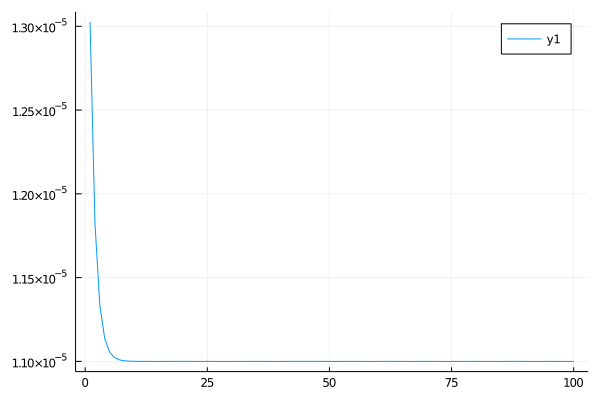

In [14]:
plot(check[5][:,1,1])

In [8]:
save_values(sess,param_model_val,tf_variables,q_t_x, q_t_y,p,"w")

print_status(sess,loss,diff_eval,T_exp,T_,N_k_dis_,tf_variables)
ScipyOptimizerMinimize(sess, opt_LFGS_sum,feed_dict = Dict(tf_variables.lambda => ones(1)*T_,tf_variables.N_k_dis=>8))
print_status(sess,loss,diff_eval,T_exp,T_,N_k_dis_,tf_variables)

check_diff = run(sess,diff_eval,feed_dict = Dict(tf_variables.lambda => ones(1)*T_,tf_variables.N_k_dis=>N_k_dis_))

-2	100.0	0.009649301956094317	5.763548660295008		4
-2	100.0	0.0044934808496536124	7.693269095329374		4


0.0044934808496536124

In [9]:
  T_exp_final =0




0

In [10]:

while T_exp <= T_exp_final

    T_=  10.0 ^ (-T_exp) 

    print_status(sess,loss,diff_eval,T_exp,T_,N_k_dis_,tf_variables)
    check_diff_ = run(sess,diff_eval,feed_dict = Dict(tf_variables.lambda => ones(1)*T_,tf_variables.N_k_dis=>N_k_dis_))  
    print_status(sess,loss,diff_eval,T_exp,T_,N_k_dis_,tf_variables)
    ScipyOptimizerMinimize(sess, opt_LFGS,feed_dict = Dict(tf_variables.lambda => ones(1)*T_,tf_variables.N_k_dis=>N_k_dis_))
    print_status(sess,loss,diff_eval,T_exp,T_,N_k_dis_,tf_variables)
    if round(T_exp,digits=2)%1 == 0

        save_values(sess,param_model_val,tf_variables,q_t_x, q_t_y,p)
        check_diff_ = run(sess,diff_eval,feed_dict = Dict(tf_variables.lambda => ones(1)*T_,tf_variables.N_k_dis=>N_k_dis_))  
        N_k_dis_ = update_K_p(sess,param_model_val,tf_variables,check_diff_,N_k_dis_,p_pre_soft_max)

    end


    T_exp += 0.1
end


-2	100.0	0.0044934808496536124	7.693269095329374		4
-2